<a href="https://www.kaggle.com/code/vanpatangan/predicting-road-accident-lgbm?scriptVersionId=272331921" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')

# Data Overview

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()
    #null_percentage = (df.isnull().sum() / total_rows * 100).round(2)

    # Create the summary 
    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        #'null_percentage': null_percentage,
        'duplicates': duplicates  
    })

    return df_check

print("Train Data")
display(check(df_train))
display(df_train.head())

print("Test Data")
display(check(df_test))
display(df_test.head())


Train Data


,column,dtype,instances,unique,sum_null,duplicates
id,id,int64,517754,517754,0,0
road_type,road_type,object,517754,3,0,0
num_lanes,num_lanes,int64,517754,4,0,0
curvature,curvature,float64,517754,261,0,0
speed_limit,speed_limit,int64,517754,5,0,0
lighting,lighting,object,517754,3,0,0
weather,weather,object,517754,3,0,0
road_signs_present,road_signs_present,bool,517754,2,0,0
public_road,public_road,bool,517754,2,0,0
time_of_day,time_of_day,object,517754,3,0,0


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


Test Data


,column,dtype,instances,unique,sum_null,duplicates
id,id,int64,172585,172585,0,0
road_type,road_type,object,172585,3,0,0
num_lanes,num_lanes,int64,172585,4,0,0
curvature,curvature,float64,172585,195,0,0
speed_limit,speed_limit,int64,172585,5,0,0
lighting,lighting,object,172585,3,0,0
weather,weather,object,172585,3,0,0
road_signs_present,road_signs_present,bool,172585,2,0,0
public_road,public_road,bool,172585,2,0,0
time_of_day,time_of_day,object,172585,3,0,0


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


# EDA

## Univariate Analysis

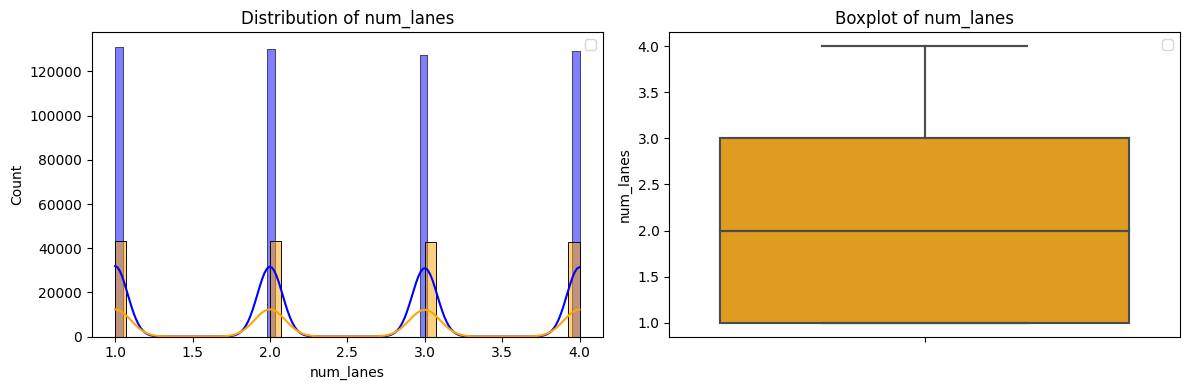

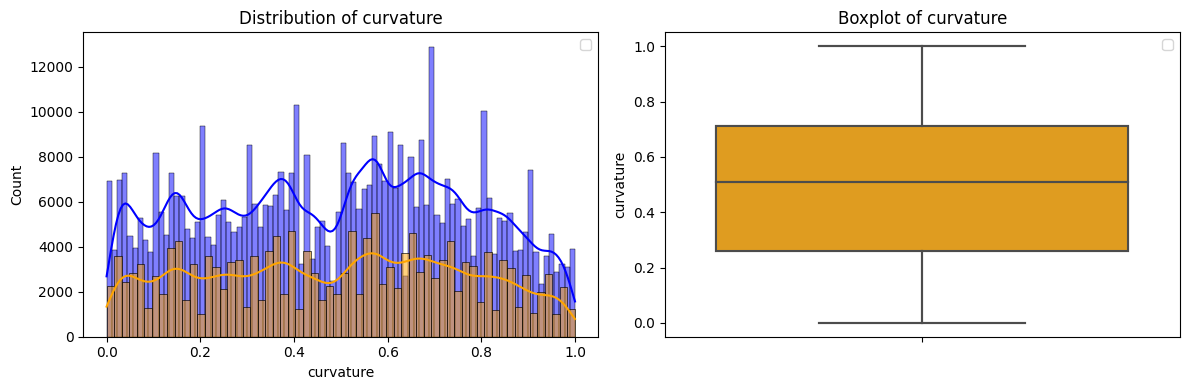

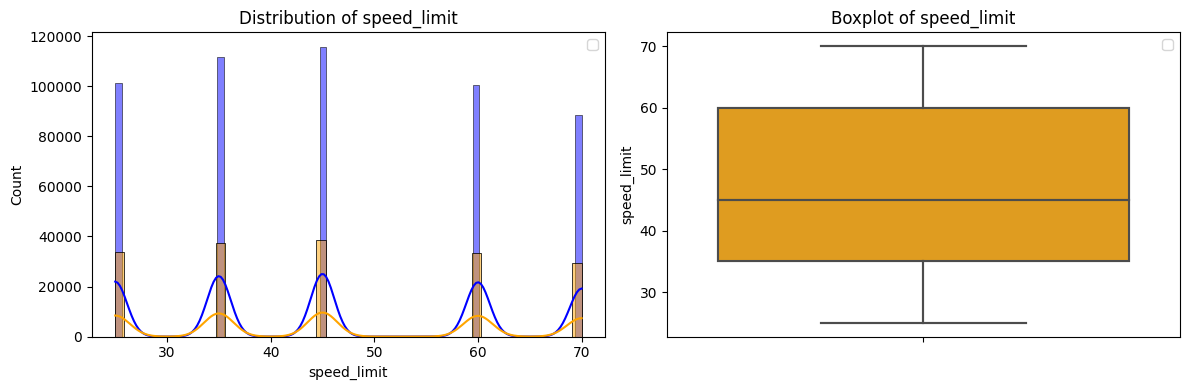

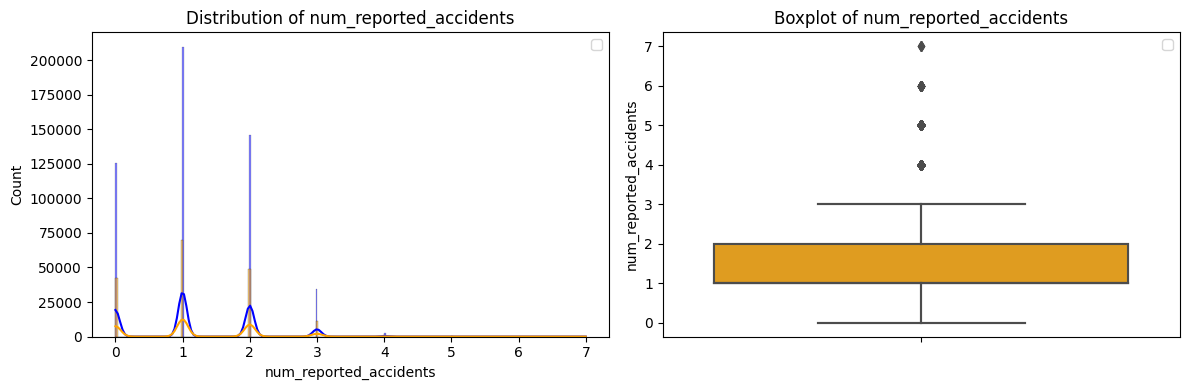

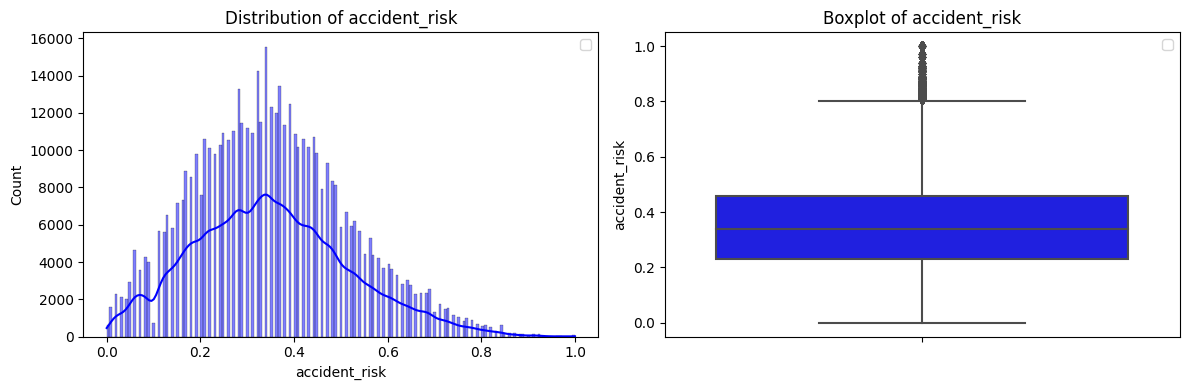

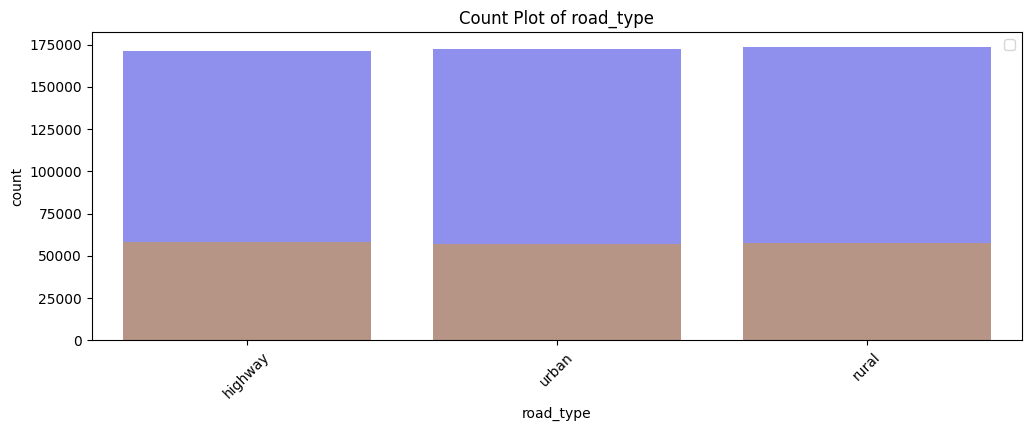

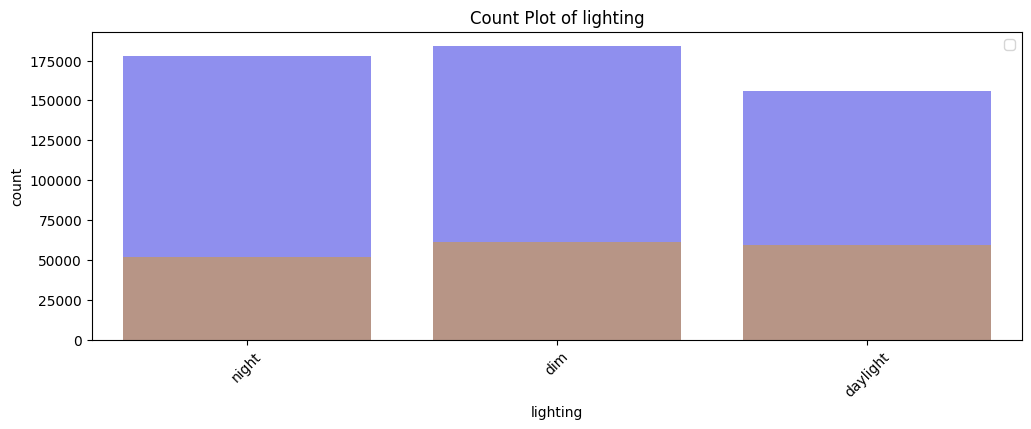

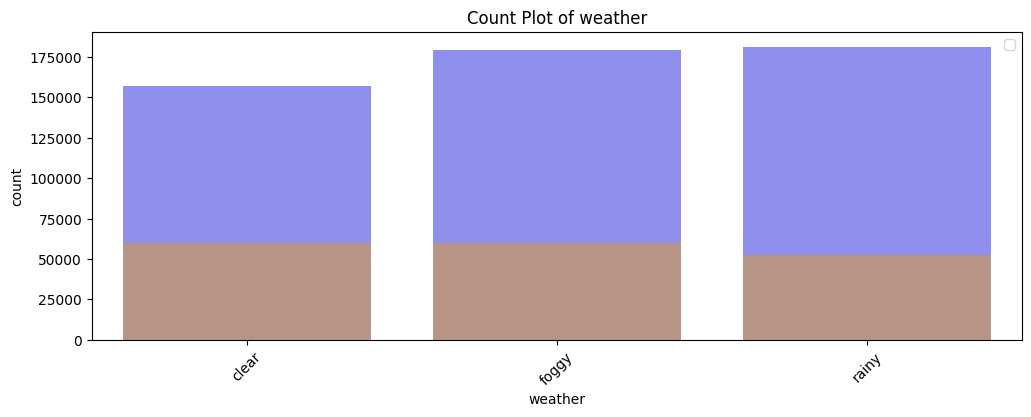

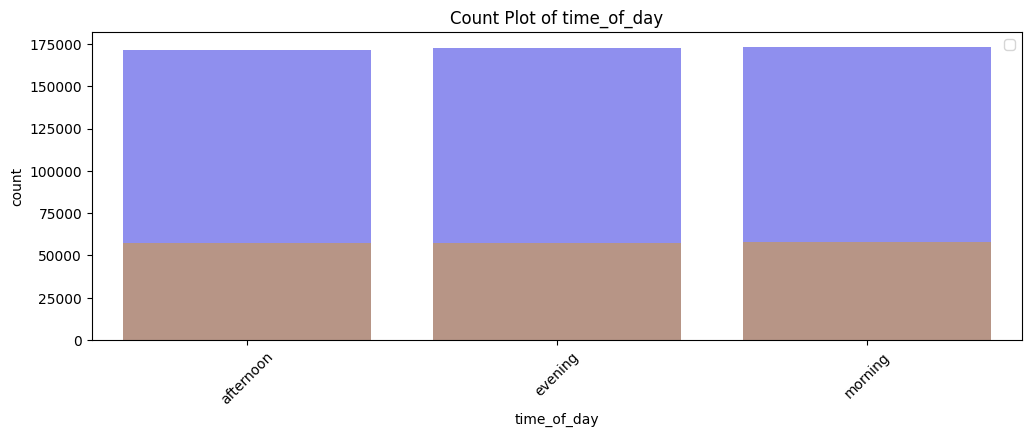

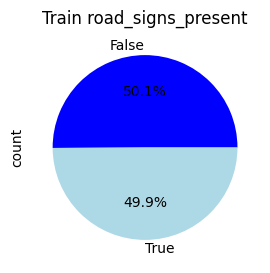

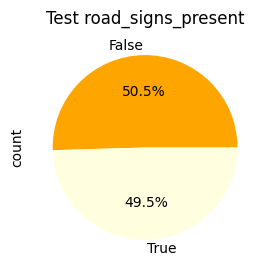

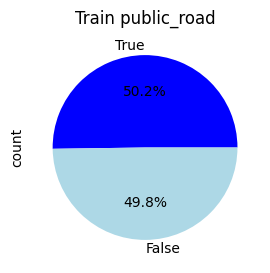

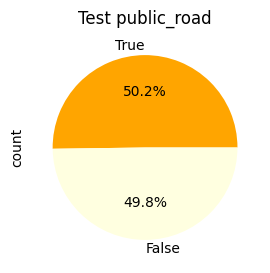

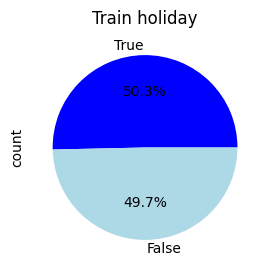

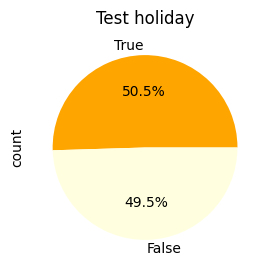

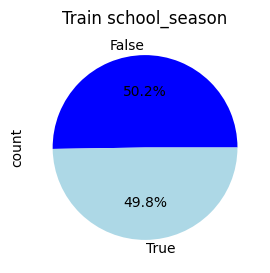

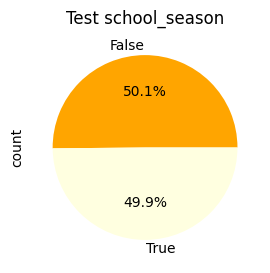

In [4]:
# Numerical Features
numerical_cols = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']
for col in numerical_cols:
    if col in df_train.columns:  # accident_risk not in test
        plt.figure(figsize=(12, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, color='blue', alpha=0.5)
        if col != 'accident_risk':
            sns.histplot(df_test[col], kde=True, color='orange', alpha=0.5)
        plt.title(f'Distribution of {col}')
        plt.legend()
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_train[col], color='blue')
        if col != 'accident_risk':
            sns.boxplot(y=df_test[col], color='orange')
        plt.title(f'Boxplot of {col}')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Categorical Features
categorical_cols = ['road_type', 'lighting', 'weather', 'time_of_day']
for col in categorical_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df_train, x=col, color='blue', alpha=0.5)
    sns.countplot(data=df_test, x=col, color='orange', alpha=0.5)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Boolean Features
boolean_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season']
for col in boolean_cols:
    plt.figure(figsize=(3, 3))
    df_train[col].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'lightblue'], title=f'Train {col}')
    plt.show()
    plt.figure(figsize=(3, 3))
    df_test[col].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'lightyellow'], title=f'Test {col}')
    plt.show()


## Bivariate Analysis (Train Only)

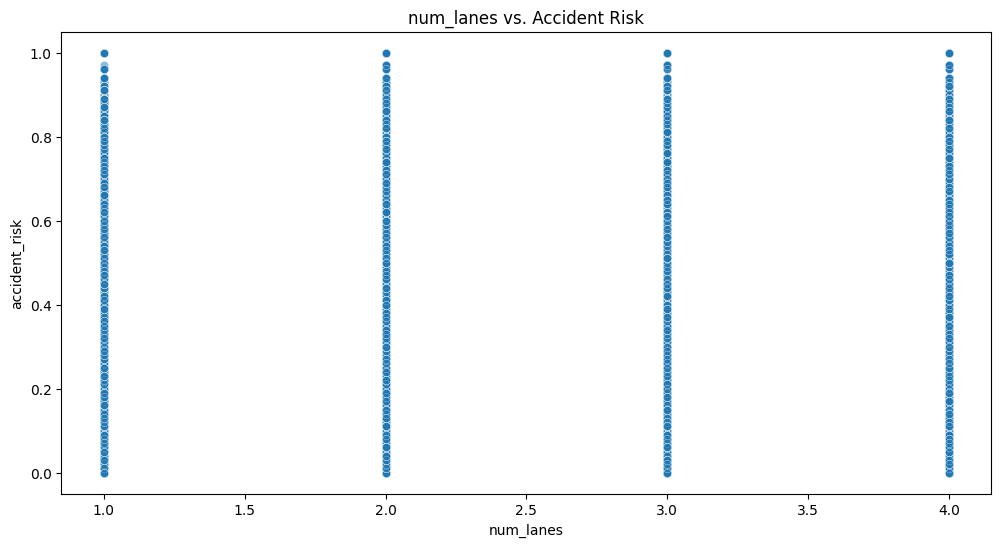

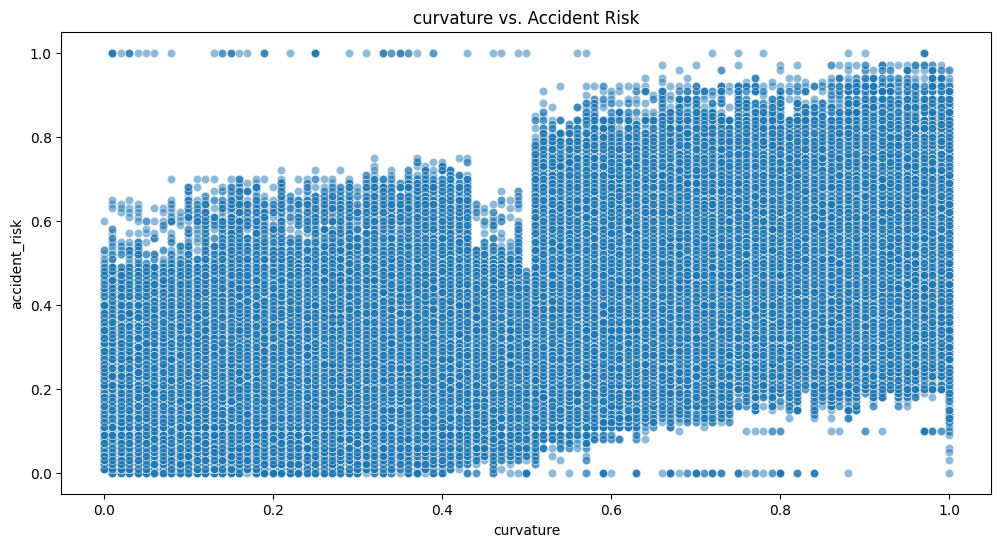

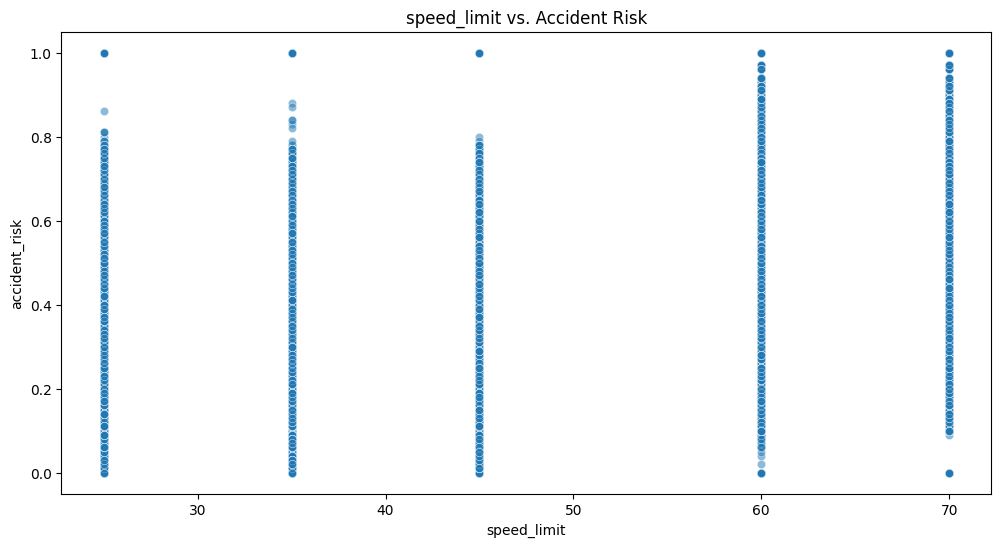

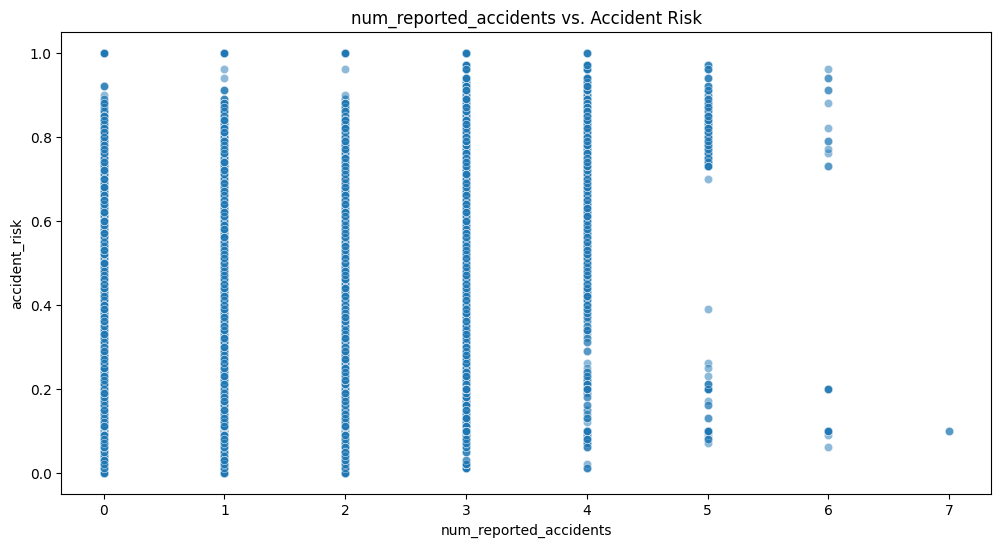

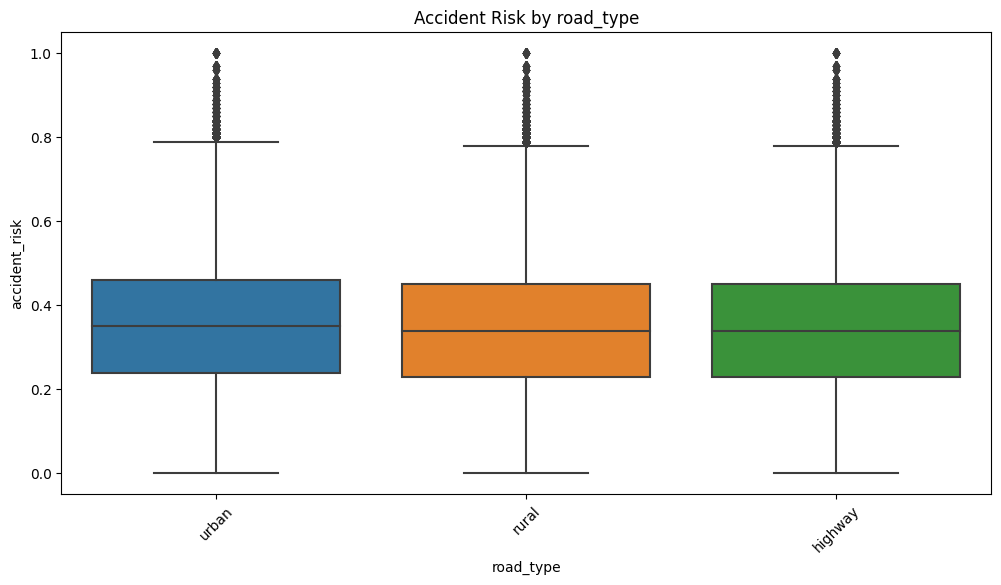

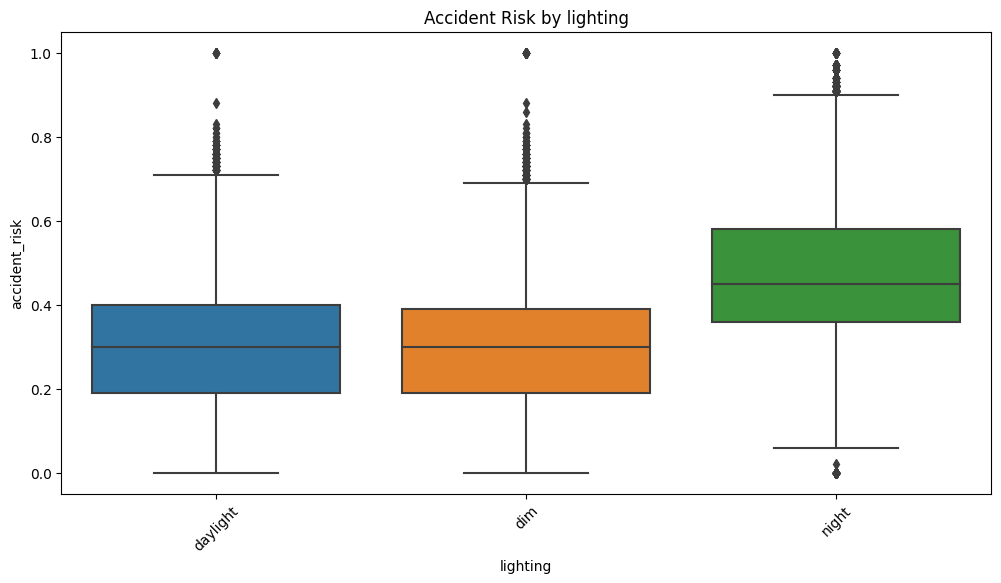

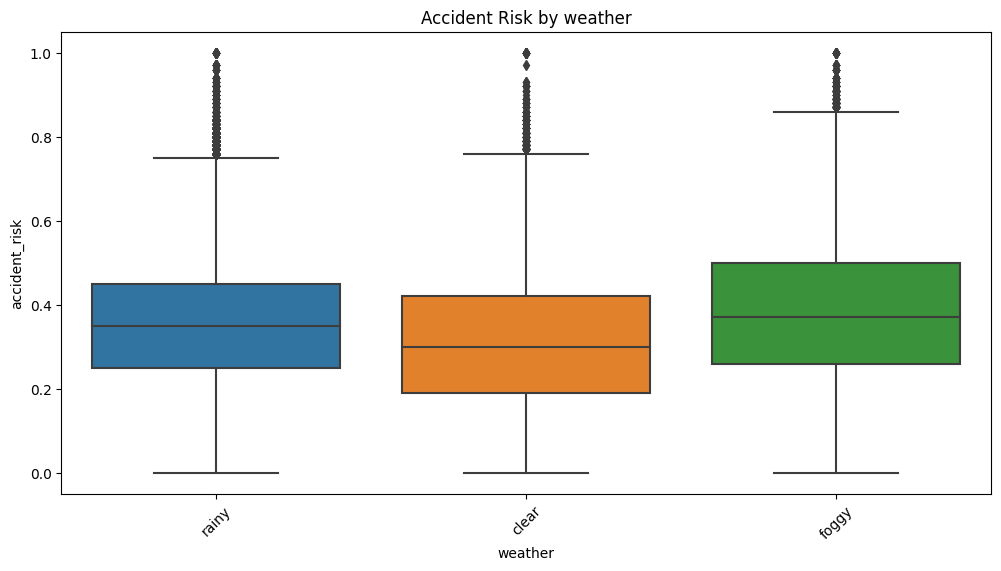

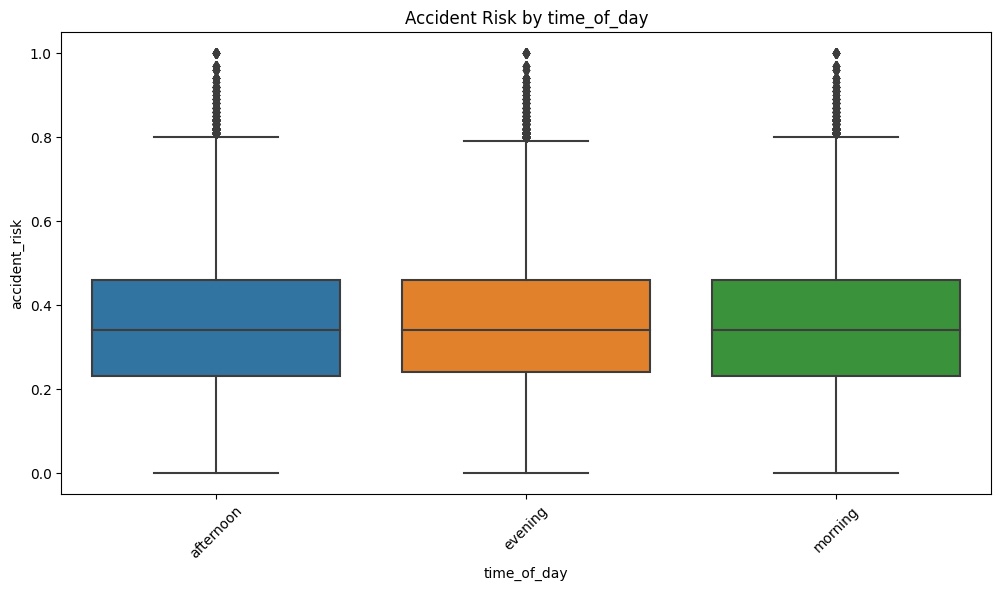

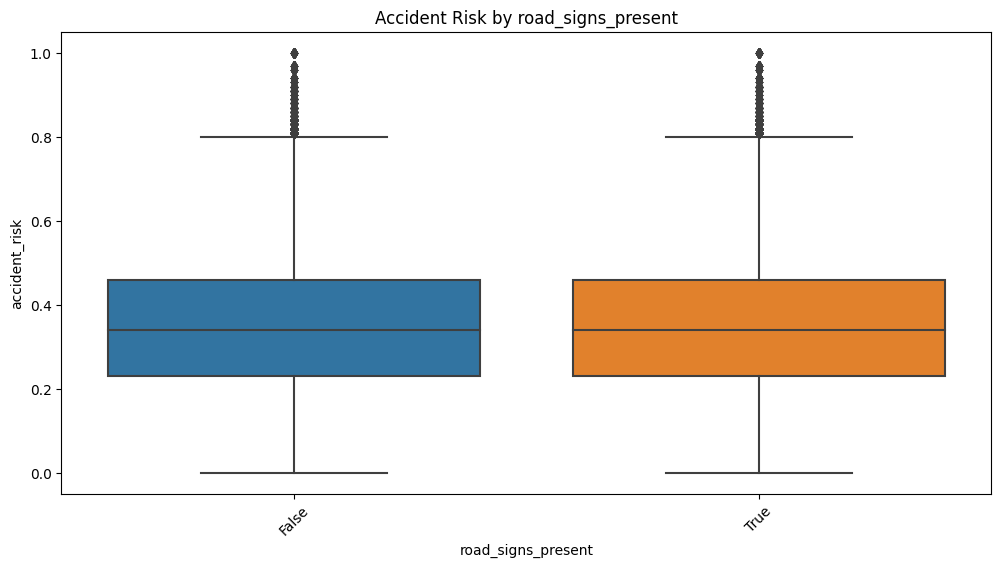

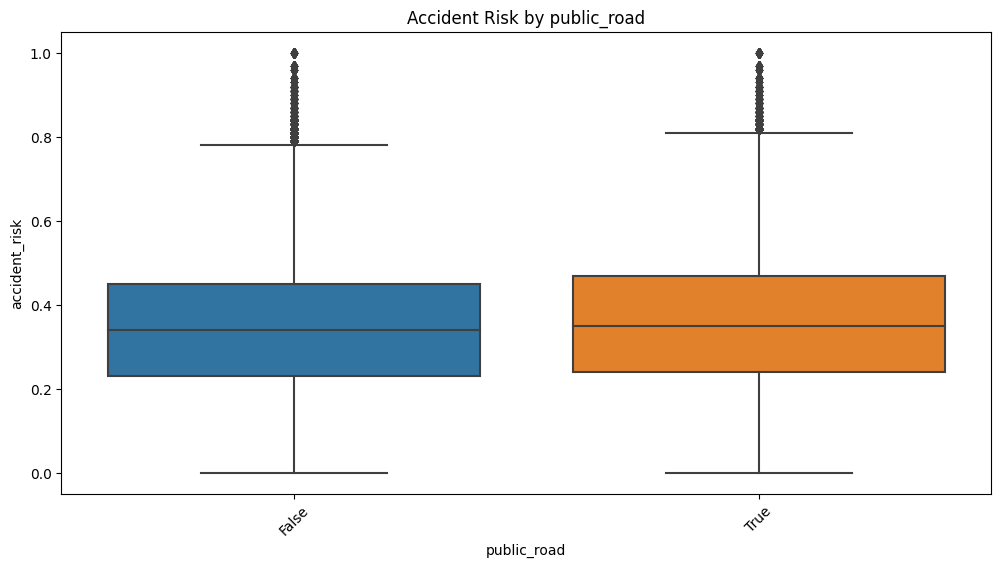

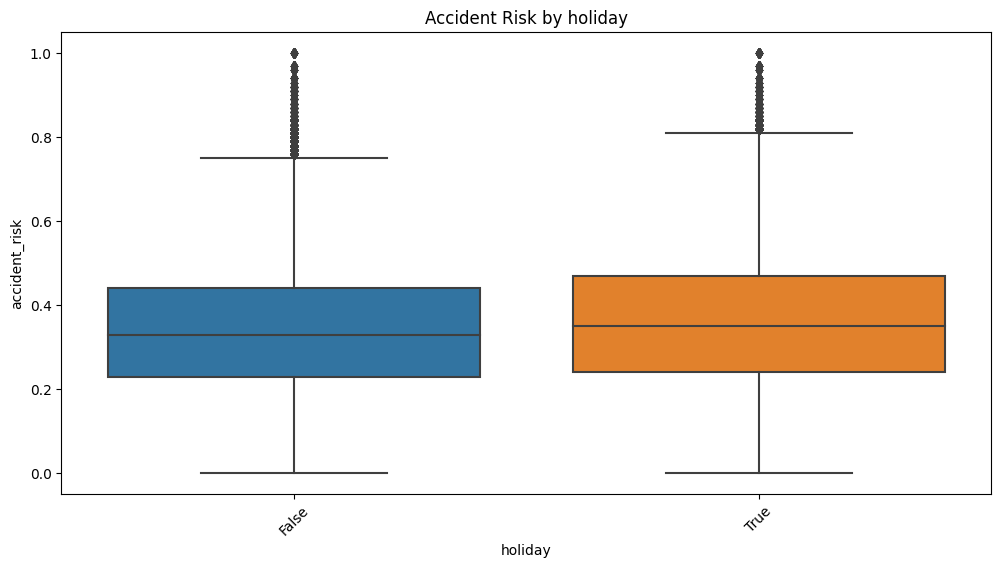

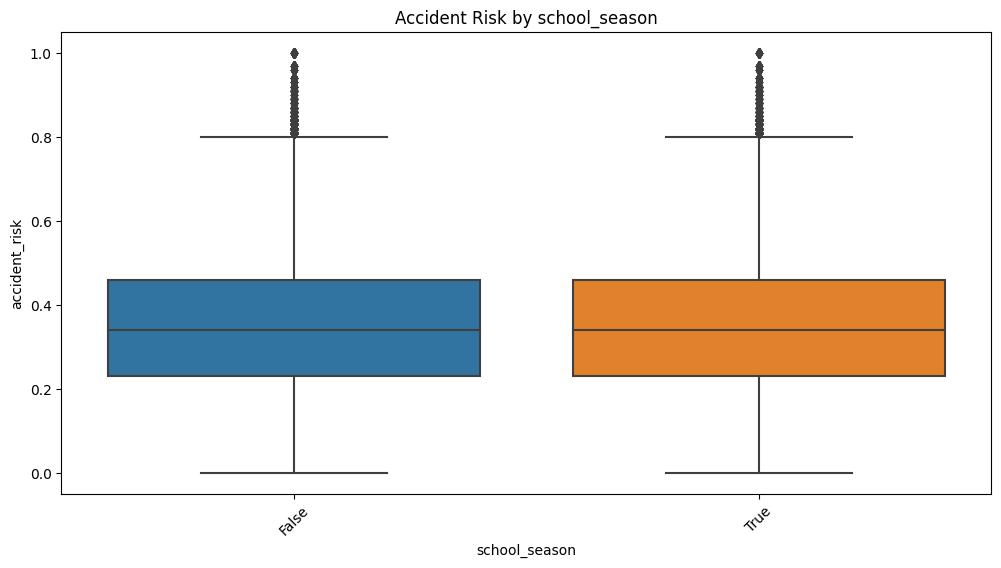

In [5]:
# Numerical vs. accident_risk
for col in numerical_cols[:-1]:  # Exclude accident_risk
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_train, x=col, y='accident_risk', alpha=0.5)
    plt.title(f'{col} vs. Accident Risk')
    plt.show()

# Categorical/Boolean vs. accident_risk
for col in categorical_cols + boolean_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_train, x=col, y='accident_risk')
    plt.title(f'Accident Risk by {col}')
    plt.xticks(rotation=45)
    plt.show()


## Investigating Outliers

In [6]:
from scipy import stats

# IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Z-Score Method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Apply to numerical columns
for col in numerical_cols:
    if col in df_train.columns:
        # IQR
        outliers_iqr, lb, ub = detect_outliers_iqr(df_train, col)
        print(f"\nOutliers in {col} (IQR Method): {len(outliers_iqr)}")
        print(f"Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}")
        print(outliers_iqr[[col, 'accident_risk']].head())
        
        # Z-Score
        outliers_z = detect_outliers_zscore(df_train, col)
        print(f"\nOutliers in {col} (Z-Score Method, |z|>3): {len(outliers_z)}")
        print(outliers_z[[col, 'accident_risk']].head())


Outliers in num_lanes (IQR Method): 0
Lower Bound: -2.00, Upper Bound: 6.00
Empty DataFrame
Columns: [num_lanes, accident_risk]
Index: []

Outliers in num_lanes (Z-Score Method, |z|>3): 0
Empty DataFrame
Columns: [num_lanes, accident_risk]
Index: []

Outliers in curvature (IQR Method): 0
Lower Bound: -0.41, Upper Bound: 1.38
Empty DataFrame
Columns: [curvature, accident_risk]
Index: []

Outliers in curvature (Z-Score Method, |z|>3): 0
Empty DataFrame
Columns: [curvature, accident_risk]
Index: []

Outliers in speed_limit (IQR Method): 0
Lower Bound: -2.50, Upper Bound: 97.50
Empty DataFrame
Columns: [speed_limit, accident_risk]
Index: []

Outliers in speed_limit (Z-Score Method, |z|>3): 0
Empty DataFrame
Columns: [speed_limit, accident_risk]
Index: []

Outliers in num_reported_accidents (IQR Method): 2649
Lower Bound: -0.50, Upper Bound: 3.50
     num_reported_accidents  accident_risk
101                       4           0.84
178                       4           0.80
356             

In [7]:
# Cap Outliers:Replace values above the 99th percentile with the 99th percentile value to reduce their influence without losing data
p99 = df_train['num_reported_accidents'].quantile(0.99)
df_train['num_reported_accidents_capped'] = df_train['num_reported_accidents'].clip(upper=p99)
df_test['num_reported_accidents_capped'] = df_test['num_reported_accidents'].clip(upper=p99)

In [8]:
# Transform apply log transformation to reduce skewness 
df_train['num_reported_accidents_log'] = np.log1p(df_train['num_reported_accidents'])
df_test['num_reported_accidents_log'] = np.log1p(df_test['num_reported_accidents'])

# Feature Engineering

In [9]:
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Combined curvature and speed limit interaction
    df['curvature_speed_interaction'] = df['curvature'] * df['speed_limit']

    # Speed limit bins for categorical transformation
    df['speed_limit_bin'] = pd.cut(
        df['speed_limit'],
        bins=[0, 30, 50, 70, 100],
        labels=['Low', 'Medium', 'High', 'Very High']
    )

    # Categorical interaction between road_type and weather
    df['road_weather'] = df['road_type'].astype(str) + '_' + df['weather'].astype(str)

    # --- Temporal Features ---
    time_col = pd.to_datetime(df['time_of_day'], errors='coerce')
    df['hour'] = time_col.dt.hour
    df['day_of_week'] = time_col.dt.dayofweek
    df['month'] = time_col.dt.month

    df['is_peak_hour'] = df['hour'].isin([7, 8, 9, 16, 17, 18, 19])
    df['is_night'] = df['hour'].between(20, 23) | df['hour'].between(0, 5)
    df['is_weekend'] = df['day_of_week'] >= 5

    def get_season(m):
        if m in [12, 1, 2]: return 'winter'
        elif m in [3, 4, 5]: return 'spring'
        elif m in [6, 7, 8]: return 'summer'
        else: return 'fall'
    df['season'] = df['month'].apply(get_season)

    df['is_school_hour'] = df['hour'].isin([7, 8, 9, 14, 15, 16])

    # --- Road Geometry Features ---
    df['curvature_category'] = pd.cut(
        df['curvature'],
        bins=[-np.inf, 0.1, 0.3, np.inf],
        labels=['straight', 'mild', 'sharp']
    )
    df['curvature_speed_ratio'] = df['curvature'] / (df['speed_limit'] + 1e-6)
    df['speed_to_curvature_ratio'] = df['speed_limit'] / (df['curvature'] + 1e-6)

    # --- Environmental Features ---
    df['visibility_level'] = np.where(
        (df['lighting'].isin(['dark', 'poor'])) | (df['weather'].isin(['fog', 'rain', 'snow'])),
        'low', 'good'
    )
    df['bad_weather_flag'] = df['weather'].isin(['rain', 'fog', 'snow', 'storm'])
    df['clear_weather_flag'] = df['weather'].isin(['clear', 'sunny'])

    # --- Contextual Features ---
    df['urban_rural'] = np.where(df['road_type'].str.contains('urban', case=False, na=False), 'urban', 'rural')
    df['school_zone_interaction'] = (
        df['school_season'].astype(int) *
        df['is_school_hour'].astype(int) *
        df['public_road'].astype(int)
    )

    # --- Interaction Features ---
    df['speed_weather_interaction'] = df['speed_limit'] * df['bad_weather_flag'].astype(int)
    df['lighting_time_interaction'] = df['is_night'].astype(int) * (df['lighting'].isin(['dark', 'poor'])).astype(int)
    df['holiday_traffic_interaction'] = df['holiday'].astype(int) * df['public_road'].astype(int)
    df['road_weather_interaction'] = df['road_weather'] + '_' + df['weather'].astype(str)

    # --- Historical Aggregates ---
    if 'num_reported_accidents' in df.columns:
        df['accident_density'] = df['num_reported_accidents'] / (df['num_lanes'] + 1e-6)
        df['recent_accident_intensity'] = np.log1p(df['num_reported_accidents'])

    # --- Safety Interactions ---
    df['curvature_speed_interaction2'] = df['curvature'] * np.log1p(df['speed_limit'])
    df['speed_limit_squared'] = df['speed_limit'] ** 2

    # Categorical encoding for relevant columns
    categorical_cols = [
        'road_type', 'lighting', 'weather', 'speed_limit_bin',
        'road_weather', 'curvature_category', 'visibility_level',
        'season', 'urban_rural', 'road_weather_interaction'
    ]
    for col in categorical_cols:
        df[col] = df[col].astype('category')

    return df

# Apply feature engineering to train and test datasets
df_train_feat = add_engineered_features(df_train)
df_test_feat = add_engineered_features(df_test)

print("✅ Feature engineering completed.")
print("Train shape:", df_train_feat.shape)
print("Test shape:", df_test_feat.shape)


✅ Feature engineering completed.
Train shape: (517754, 43)
Test shape: (172585, 42)


# Preprocess

In [10]:
from typing import Tuple, List
from pandas.api.types import CategoricalDtype

def preprocess_for_lgbm(
    df_train_feat: pd.DataFrame,
    df_test_feat: pd.DataFrame,
    target_col: str = 'accident_risk',
    id_col: str = 'id',
    drop_id: bool = True
) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, List[str], pd.Series]:
    """
    Prepares dataframes for LightGBM modeling by:
      - Separating target from train
      - Converting specified categorical columns to pandas Categorical dtype using train categories
      - Converting boolean columns to int
      - Dropping ID column
      - Returning (X_train, y_train, X_test, categorical_columns, test_ids)
    """
    train = df_train_feat.copy()
    test = df_test_feat.copy()

    # Separate target variable
    if target_col not in train.columns:
        raise KeyError(f"Target column '{target_col}' not found in training data")
    y = train[target_col].copy()
    train.drop(columns=[target_col], inplace=True)

    # Define columns to treat as numeric, categorical, and boolean
    num_cols = [
        'num_lanes', 'curvature', 'speed_limit',
        'num_reported_accidents', 'num_reported_accidents_capped',
        'num_reported_accidents_log', 'curvature_speed_interaction'
    ]
    cat_cols = [
        'road_type', 'lighting', 'weather',
        'time_of_day', 'road_weather', 'speed_limit_bin'
    ]
    bool_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season']

    # Validate presence of numeric and categorical columns
    missing_num = [c for c in num_cols if c not in train.columns or c not in test.columns]
    missing_cat = [c for c in cat_cols if c not in train.columns or c not in test.columns]

    if missing_num:
        raise KeyError(f"Missing numeric columns in train/test: {missing_num}")
    if missing_cat:
        raise KeyError(f"Missing categorical columns in train/test: {missing_cat}")

    # Handle IDs
    ids_train = train[id_col].copy() if id_col in train.columns else pd.Series(np.arange(len(train)), name='id')
    ids_test = test[id_col].copy() if id_col in test.columns else pd.Series(np.arange(len(test)), name='id')

    if drop_id:
        train.drop(columns=[id_col], inplace=True, errors='ignore')
        test.drop(columns=[id_col], inplace=True, errors='ignore')

    # Convert boolean columns to int where available
    for c in bool_cols:
        if c in train.columns:
            train[c] = train[c].astype(int)
        if c in test.columns:
            test[c] = test[c].astype(int)

    # Convert categorical columns to string and then to Categorical with train categories
    for c in cat_cols:
        train[c] = train[c].astype(str)
        test[c] = test[c].astype(str)
        categories = list(pd.unique(train[c]))
        cat_type = CategoricalDtype(categories=categories, ordered=False)
        train[c] = train[c].astype(cat_type)
        test[c] = test[c].astype(cat_type)

    # Align columns between train and test (only keep common columns)
    common_cols = [col for col in train.columns if col in test.columns]
    train = train[common_cols]
    test = test[common_cols]

    return train, y, test, cat_cols, ids_test

# Usage
X_train, y_train, X_test, cat_cols, ids_test = preprocess_for_lgbm(df_train_feat, df_test_feat, drop_id=True)


# Model

In [11]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split, cross_val_score
#from sklearn.metrics import mean_absolute_error, r2_score

def lgbm_kfold_train(X, y, X_test, categorical_cols, ids_test=None,
                     n_splits=5, params=None, num_boost_round=10000,
                     early_stopping_rounds=100, verbose=200, seed=42):
    """
    Train LightGBM with KFold CV,return OOF preds, test preds (mean), 
    fold RMSEs, and feature importances.
    """
    if params is None:
        params = {
            "objective": "regression",
            "metric": "rmse",
            "boosting_type": "gbdt",
            "learning_rate": 0.05,
            "num_leaves": 31,
            "feature_fraction": 0.8,
            "bagging_freq": 1,
            "bagging_fraction": 0.8,
            "min_child_samples": 20,
            "verbosity": -1,
            "seed": seed,
        }

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    oof_preds = np.zeros(len(X))
    test_preds = np.zeros(len(X_test))
    fold_rmse = []
    feature_importances = pd.DataFrame()
    feature_importances['feature'] = X.columns

    for fold, (tr_idx, val_idx) in enumerate(kf.split(X, y)):
        print(f"\n--- Fold {fold+1}/{n_splits} ---")
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

        model = lgb.LGBMRegressor(**params, n_estimators=num_boost_round)

        # Use callbacks 
        callbacks = [
            early_stopping(stopping_rounds=early_stopping_rounds),
            log_evaluation(period=verbose)
        ]

        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='rmse',
            categorical_feature=categorical_cols,
            callbacks=callbacks
        )

        # Predict
        val_pred = model.predict(X_val, num_iteration=model.best_iteration_)
        oof_preds[val_idx] = val_pred
        fold_rmse.append(float(np.sqrt(mean_squared_error(y_val, val_pred))))
        print(f"Fold {fold+1} RMSE: {fold_rmse[-1]:.5f}")

        # test predictions (average)
        test_preds += model.predict(X_test, num_iteration=model.best_iteration_) / n_splits

        # feature importance (gain)
        imp = model.booster_.feature_importance(importance_type='gain')
        feature_importances[f'fold_{fold+1}'] = imp

    # Overall OOF RMSE
    oof_rmse = float(np.sqrt(mean_squared_error(y, oof_preds)))
    print(f"\nOOF RMSE: {oof_rmse:.5f}")
    print("Fold RMSEs:", [round(x, 5) for x in fold_rmse])

    # Aggregate feature importance (mean across folds)
    feature_importances['importance_mean'] = feature_importances[
        [c for c in feature_importances.columns if c.startswith('fold_')]
    ].mean(axis=1)
    feature_importances = feature_importances.sort_values(
        by='importance_mean', ascending=False
    ).reset_index(drop=True)

    return {
        'oof_preds': oof_preds,
        'test_preds': test_preds,
        'oof_rmse': oof_rmse,
        'fold_rmse': fold_rmse,
        'feature_importances': feature_importances
    }

result = lgbm_kfold_train(
    X_train, y_train, X_test,
    categorical_cols=cat_cols,
    n_splits=5,
    early_stopping_rounds=100,
    verbose=100
)



--- Fold 1/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0566699
[200]	valid_0's rmse: 0.0564172
[300]	valid_0's rmse: 0.0563602
[400]	valid_0's rmse: 0.0563303
[500]	valid_0's rmse: 0.0563162
[600]	valid_0's rmse: 0.0563107
[700]	valid_0's rmse: 0.0563012
[800]	valid_0's rmse: 0.0562976
[900]	valid_0's rmse: 0.0562944
[1000]	valid_0's rmse: 0.0562924
Early stopping, best iteration is:
[972]	valid_0's rmse: 0.056289
Fold 1 RMSE: 0.05629

--- Fold 2/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0564829
[200]	valid_0's rmse: 0.0562525
[300]	valid_0's rmse: 0.0562016
[400]	valid_0's rmse: 0.0561761
[500]	valid_0's rmse: 0.0561627
[600]	valid_0's rmse: 0.0561589
Early stopping, best iteration is:
[588]	valid_0's rmse: 0.0561577
Fold 2 RMSE: 0.05616

--- Fold 3/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0565276
[200]	valid_0's rmse: 0.0562778
[300]	va

## Feature Importance

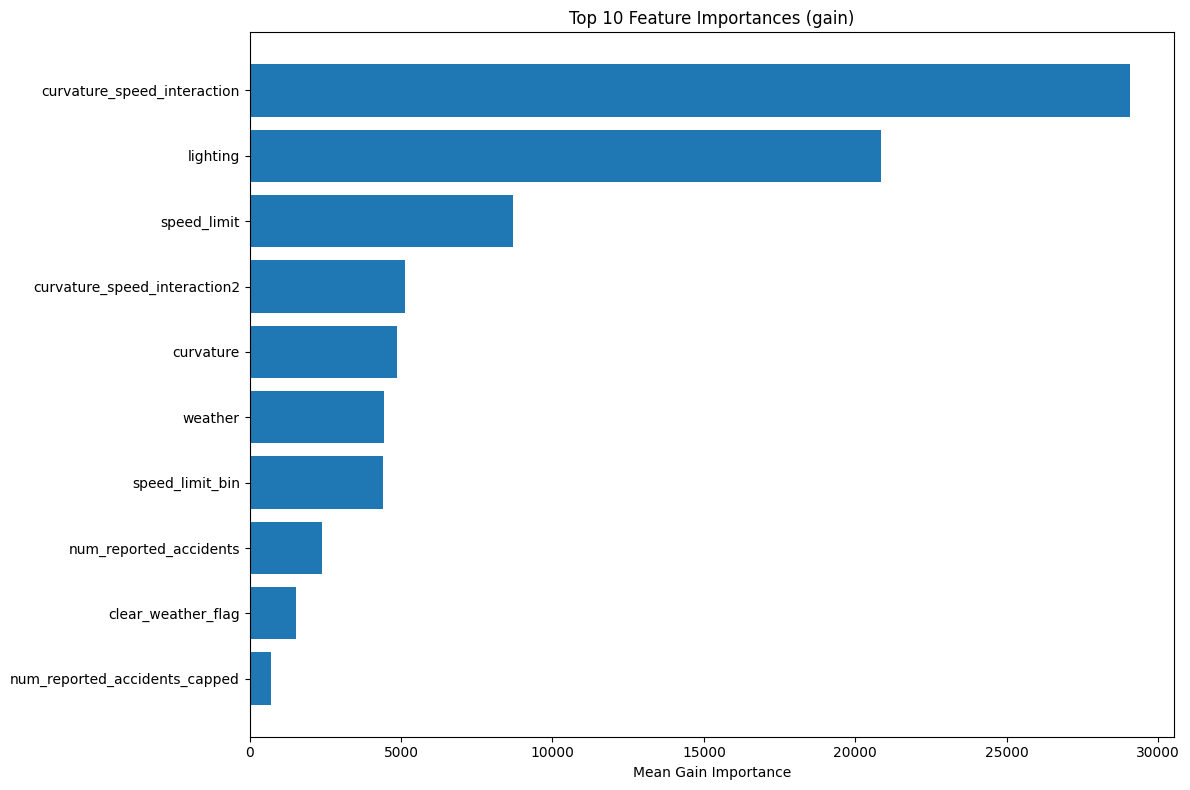

In [12]:
def plot_feature_importance(feature_importances: pd.DataFrame, top_n: int = 10, figsize=(12,8)):
    """
    Horizontal bar plot of top_n features by mean importance.
    """
    top = feature_importances.head(top_n).iloc[::-1]  # reverse for horizontal bar
    plt.figure(figsize=figsize)
    plt.barh(top['feature'], top['importance_mean'])
    plt.xlabel('Mean Gain Importance')
    plt.title(f'Top {min(top_n, len(feature_importances))} Feature Importances (gain)')
    plt.tight_layout()
    plt.show()

plot_feature_importance(result['feature_importances'], top_n=10)

# Submission

In [13]:
# Submission
submission = pd.DataFrame({
    'id': ids_test.values,
    'accident_risk': result['test_preds']
})

submission.to_csv('submission.csv', index=False)
submission.head()

,id,accident_risk
0,517754,0.294985
1,517755,0.123501
2,517756,0.184519
3,517757,0.314402
4,517758,0.411420
